In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

print(tf.__version__)

2.19.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Image_Classification"
  ,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(224,224),
  batch_size=16
)

Found 12600 files belonging to 6 classes.
Using 10080 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Image_Classification"
  ,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(224,224),
  batch_size=16
)

Found 12600 files belonging to 6 classes.
Using 2520 files for validation.


In [ ]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255.0, label

train_ds = train_ds.map(normalize_img)
val_ds = val_ds.map(normalize_img)

In [ ]:
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

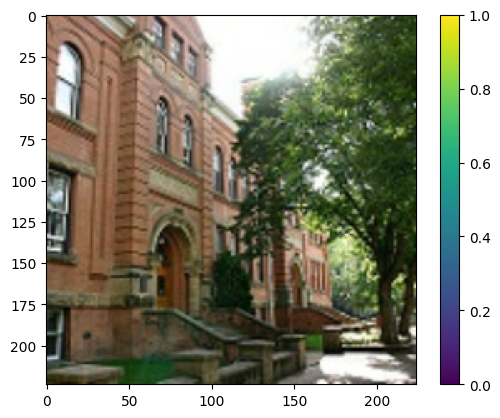

In [ ]:
plt.figure()
for image, label in train_ds.take(1):
  plt.imshow(image[0]) # Display the first image from the batch
  break
plt.colorbar()

plt.show()

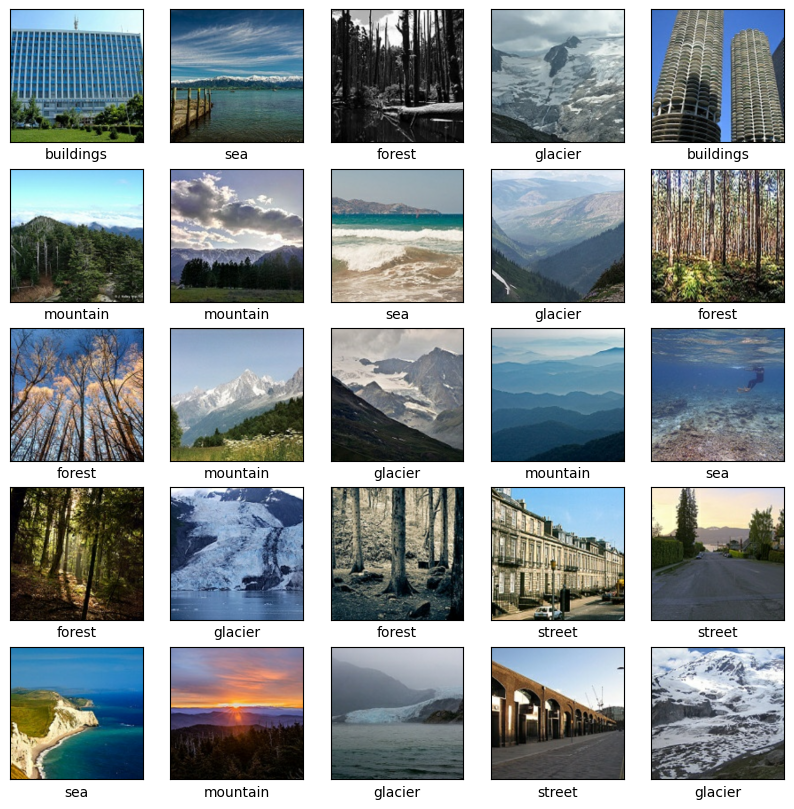

In [ ]:
plt.figure(figsize=(10,10))

# To get individual images and labels from a tf.data.Dataset, we need to iterate or take a batch
# Since batch_size is 16, we'll take a few batches to get 25 images
all_images = []
all_labels = []

for image_batch, label_batch in train_ds.take(2):
    # Convert TensorFlow tensors to NumPy arrays for matplotlib
    all_images.extend(image_batch.numpy())
    all_labels.extend(label_batch.numpy())

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(all_images[i])
    plt.xlabel(class_names[all_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224,3)), # always the first layer is fallten to get data from outside
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6) # output layer and always the number of nerouns is equal to the number categories of the final output
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=30)

Epoch 1/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 282s 445ms/step - accuracy: 0.3253 - loss: 9.2572 - val_accuracy: 0.4056 - val_loss: 1.5127
Epoch 2/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 322s 446ms/step - accuracy: 0.4403 - loss: 1.5086 - val_accuracy: 0.5151 - val_loss: 1.3407
Epoch 3/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 295s 467ms/step - accuracy: 0.4853 - loss: 1.3678 - val_accuracy: 0.4742 - val_loss: 1.3643
Epoch 4/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 305s 484ms/step - accuracy: 0.4721 - loss: 1.3506 - val_accuracy: 0.4988 - val_loss: 1.2979
Epoch 5/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 314s 471ms/step - accuracy: 0.4875 - loss: 1.3102 - val_accuracy: 0.4976 - val_loss: 1.2753
Epoch 6/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 301s 478ms/step - accuracy: 0.5084 - loss: 1.2741 - val_accuracy: 0.5484 - val_loss: 1.2028
Epoch 7/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 312s 461ms/step - accuracy: 0.5218 - loss: 1.2483 - val_accuracy: 0.5306 - val_loss: 1.2333
Epoch 8/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 320s 508ms/step - accuracy: 0.5283 -

In [ ]:
loss, val_acc = model.evaluate(val_ds) #verbose=2: This parameter controls the verbosity or level of detail of the output during evaluation. In this case, verbose=2 means that detailed information will be displayed during the evaluation process, including the loss and metrics.


print('\nValidation accuracy:', val_acc)

158/158 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.5549 - loss: 1.2389

Validation accuracy: 0.5452380776405334


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(val_ds)

158/158 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step


In [ ]:
predictions[55]

array([0.09978022, 0.00976211, 0.00228486, 0.00291955, 0.0281858 ,
       0.8570675 ], dtype=float32)

Image Prediction

In [ ]:
import numpy as np
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(len(class_names))) # Changed from range(10) to range(len(class_names))
  plt.yticks([])
  thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777") # Changed from range(10) to range(len(class_names))
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

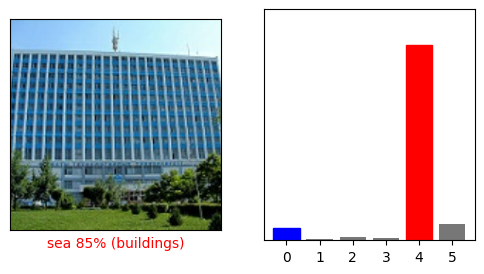

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], all_labels, all_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], all_labels)
plt.show()

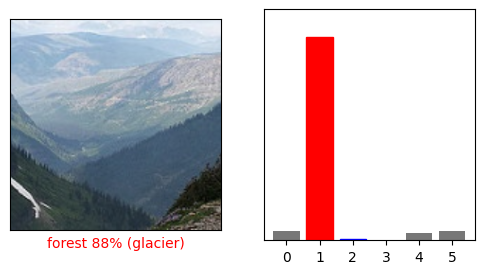

In [ ]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], all_labels, all_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], all_labels)
plt.show()

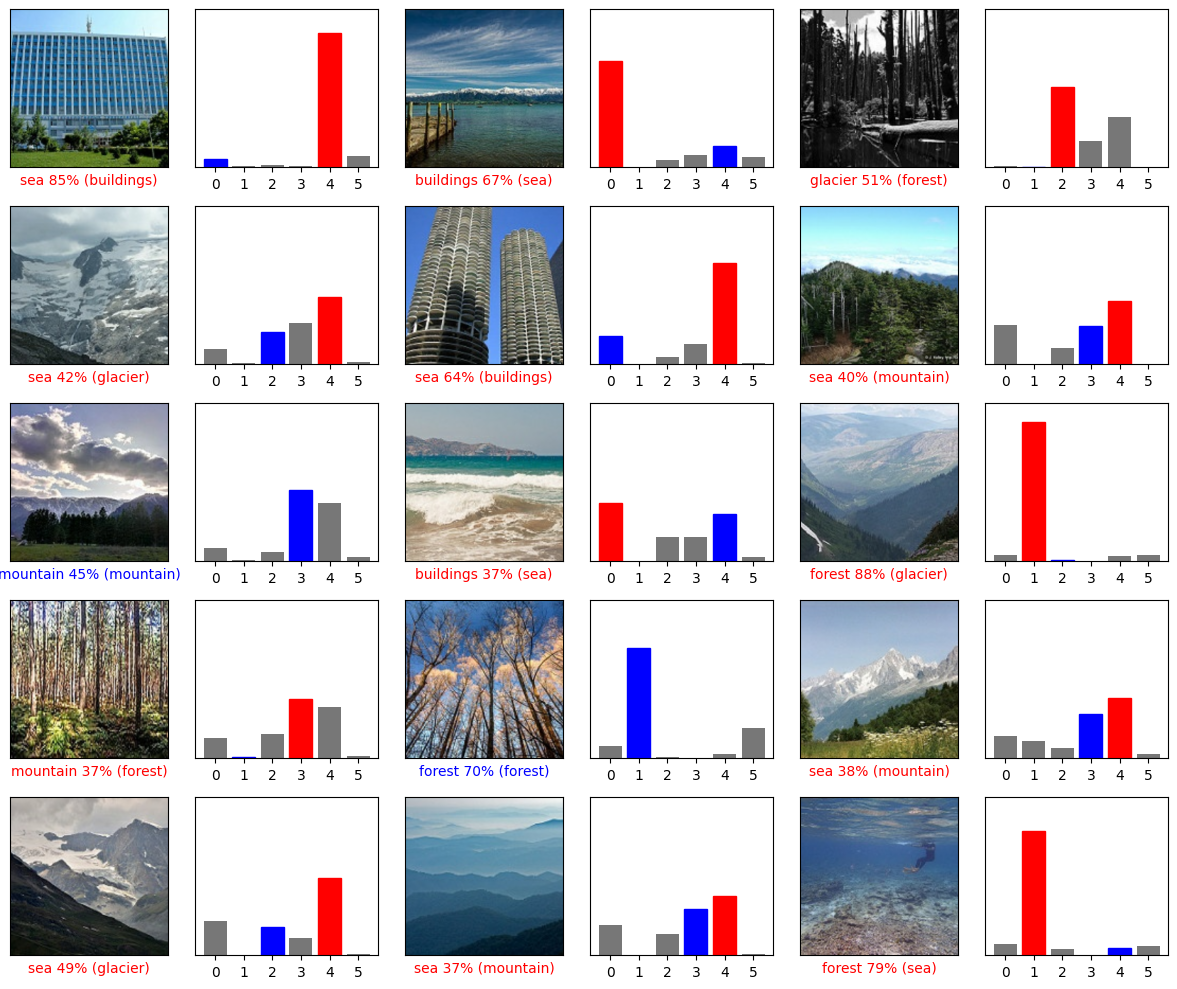

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], all_labels, all_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], all_labels)
plt.tight_layout()
plt.show()